## Flight Price Prediction
### Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 


## Importing the Libraries

In [51]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

In [85]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
 
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

## The Data

#### Let us import the data which is provided in csv file, we will convert into Dataframe format as per convenience.

In [3]:
#importing training dataset
train_d = pd.read_excel('Data_Train.xlsx')
train_d

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
#importing test dataset
test_d = pd.read_excel('Test_set.xlsx')
test_d

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [5]:
#Let us check the datatypes inwhich all the attributes are available for both test and train sets
print('Train set Datatypes: \n',train_d.dtypes,'\n','*'*60)

print('\nTest set Datatypes: \n',test_d.dtypes)

Train set Datatypes: 
 Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object 
 ************************************************************

Test set Datatypes: 
 Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object


#### We can see all the attributes in data set are in categorical format which is not suitable for building our models, hence we need to convert all these into numerical format.

In [6]:
#getting the overview of the datasets and if there is any null values on overview
print('Train set Information:\n')
train_d.info()

print('*'*60,'\nTest set Information: \n')
test_d.info()

Train set Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
************************************************************ 
Test set Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count

In [7]:
#checking the names of all the attributes in the data sets
print('Train set Datatypes:\n',train_d.columns)

print('*'*60,'\nTest set Datatypes:')
test_d.columns

Train set Datatypes:
 Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')
************************************************************ 
Test set Datatypes:


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

#### We can see that, 'Price' attribute is the target variable and it is not present in the Test data set.

##### Let us check the null values for test and train datasets, and treat them.

In [10]:

print('Train set null values:\n',train_d.isnull().sum())

print('*'*60,'\nTest set null values:\n',test_d.isnull().sum())


Train set null values:
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64
************************************************************ 
Test set null values:
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [9]:
#as there is only 1 null value in the attributes, let us drop the records as it is not going to impact the analysis
train_d.dropna(inplace=True)

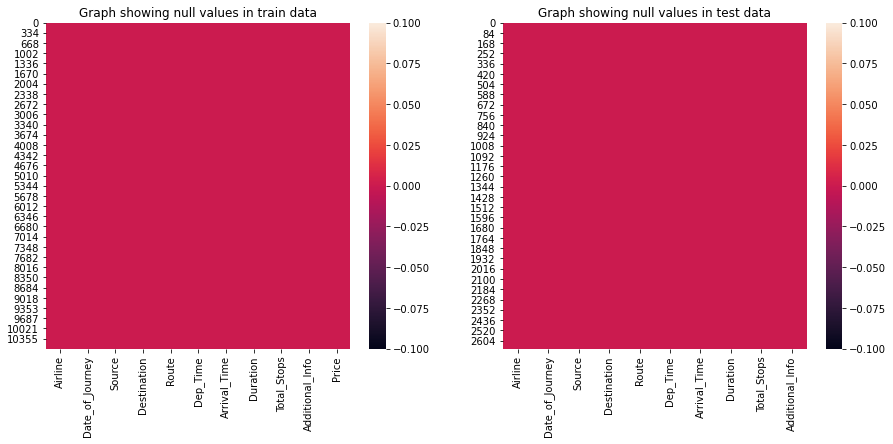

In [11]:
#visualizing the null values after the removal for both train and test data

plt.figure(figsize=(15,6),facecolor='white')
ax = plt.subplot(1,2,1)
sns.heatmap(train_d.isnull())
plt.title('Graph showing null values in train data')

ax = plt.subplot(1,2,2)
sns.heatmap(test_d.isnull())
plt.title('Graph showing null values in test data')

plt.show()

## Exploratory Data Analysis

### To analyse the data let us combine both train and test data set in order to apply all methods on datasets.


In [12]:
#adding the labels to both datasets to understand the source of data
train_d['label'] = 'train'
test_d['label']='test'

#checking the shape of both test and train data
train_d.shape, test_d.shape

((10682, 12), (2671, 11))

In [13]:
#using concat method to combine both dataset
df = pd.concat([train_d, test_d],ignore_index=True)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,label
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13348,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test
13349,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test
13350,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test
13351,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test


## Univariate Analysis

#### Let us visualize the distribution, relationship and information of all the attributes using various graph methods.

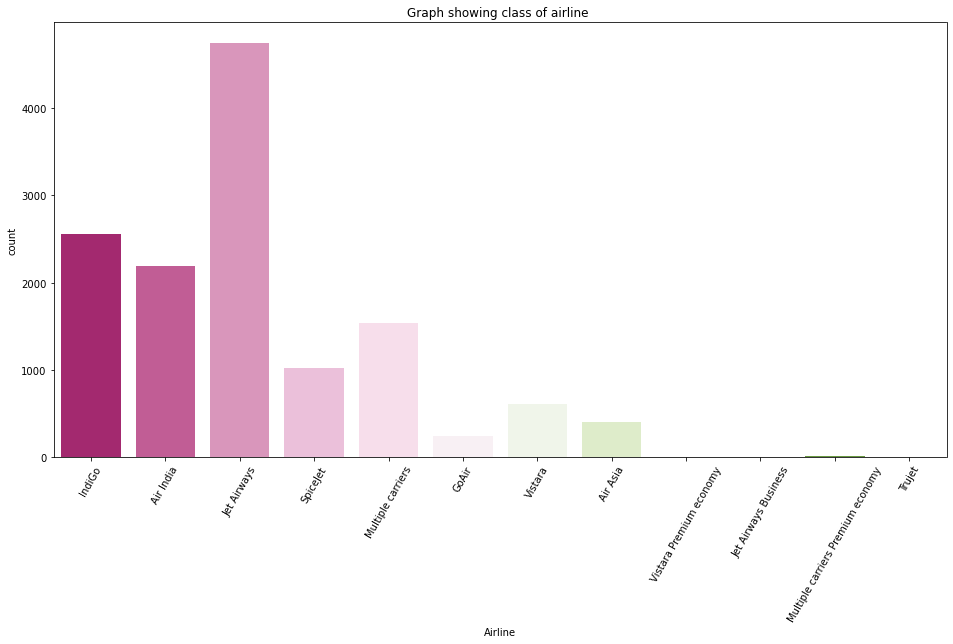

In [14]:
#using bar graph 

plt.figure(figsize=(16,8), facecolor='white')
sns.countplot(df['Airline'], palette='PiYG')
plt.xticks(rotation=60)
plt.title("Graph showing class of airline ")

plt.show()

#### We can see that, Jet Airways is the highest used Airlines in India, followed by IndiGo,Air India. 80% of airline industry is covered by these company.

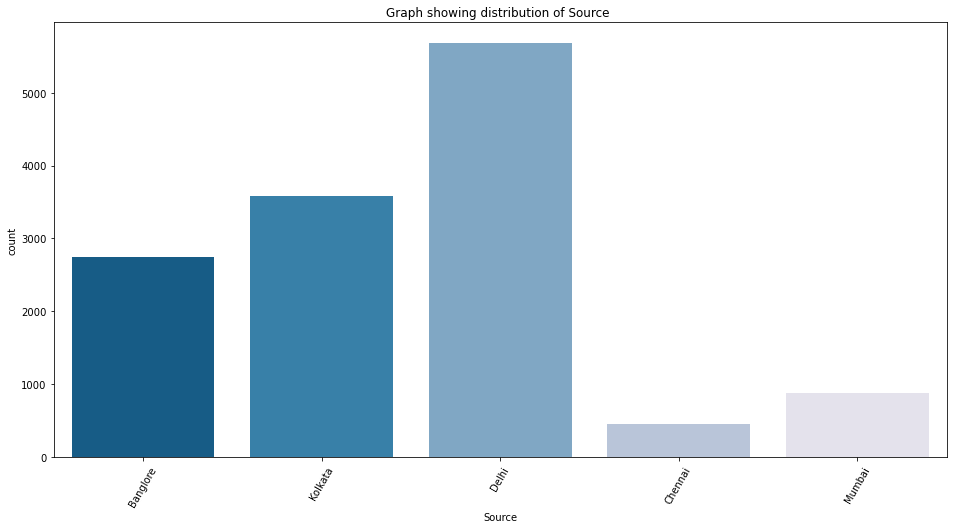

In [15]:
plt.figure(figsize=(16,8), facecolor='white')
sns.countplot(df['Source'],palette='PuBu_r')
plt.xticks(rotation=60)
plt.title("Graph showing distribution of Source ")
plt.show()

#### Most number of flights are seen leaving from Delhi and then Kolkata.

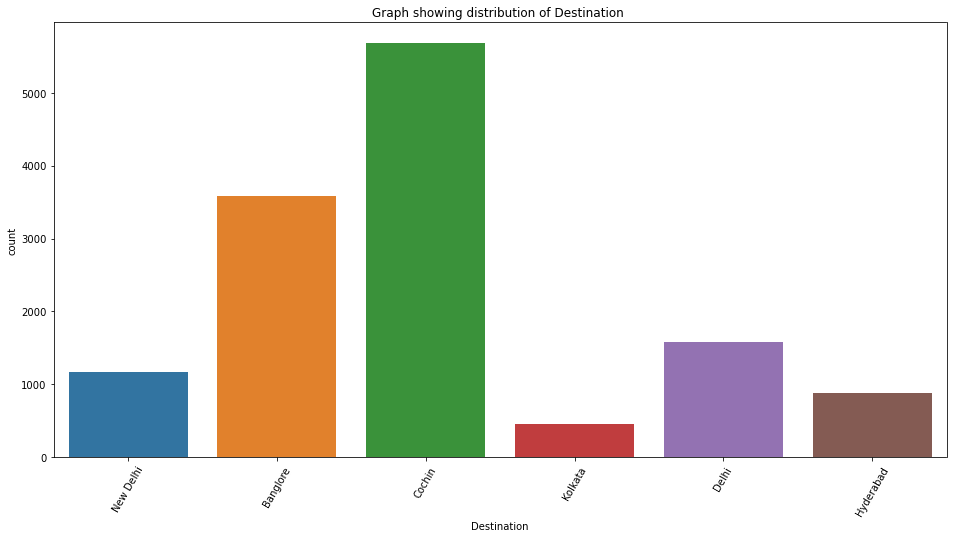

In [16]:
plt.figure(figsize=(16,8), facecolor='white')
sns.countplot(df['Destination'])
plt.xticks(rotation=60)
plt.title("Graph showing distribution of Destination ")
plt.show()

#### Highest number of flights touched down were to Cochin, followed by Banglore.

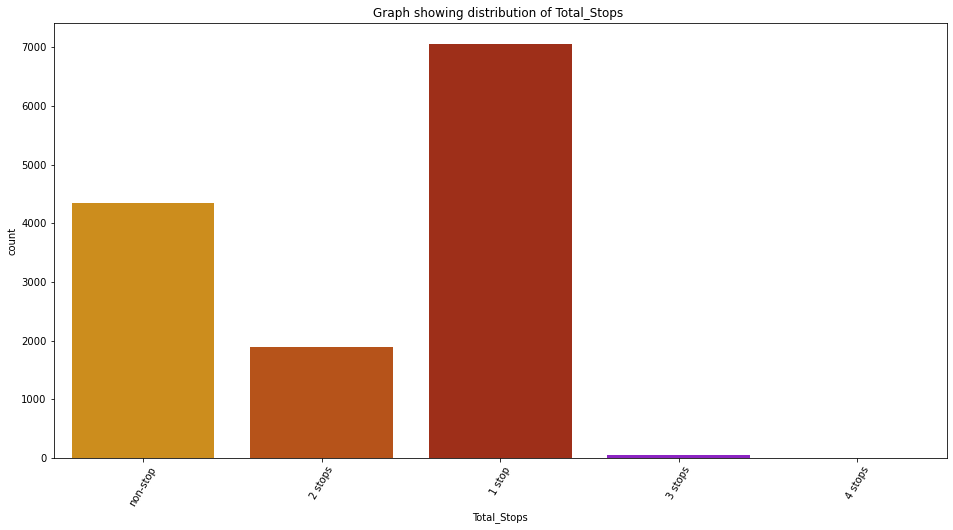

In [17]:
plt.figure(figsize=(16,8), facecolor='white')
sns.countplot(df['Total_Stops'], palette='gnuplot_r')
plt.xticks(rotation=60)
plt.title("Graph showing distribution of Total_Stops ")
plt.show()

#### Most of flights travelled, mostly had 1 stop connecting flights may be due to various reasons. Price might be one of reason.

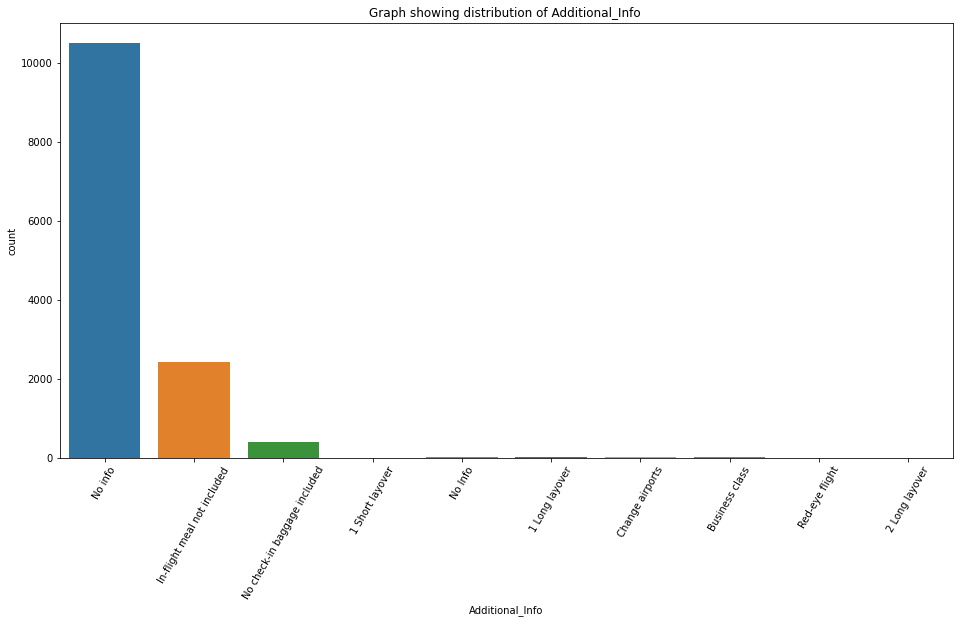

In [18]:
plt.figure(figsize=(16,8), facecolor='white')
sns.countplot(df['Additional_Info'])
plt.xticks(rotation=60)
plt.title("Graph showing distribution of Additional_Info ")
plt.show()

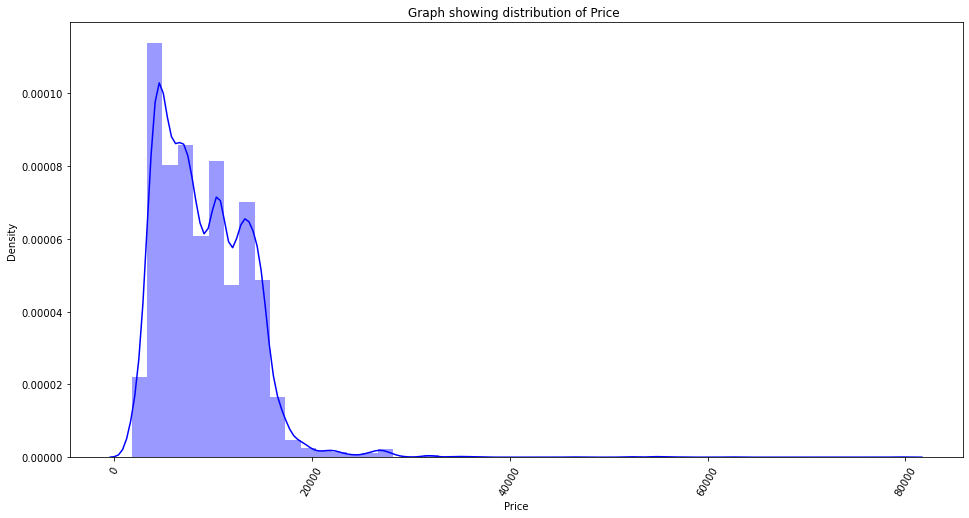

In [19]:
plt.figure(figsize=(16,8), facecolor='white')
sns.distplot(df['Price'], color='blue')
plt.xticks(rotation=60)
plt.title("Graph showing distribution of Price ")
plt.show()

#### The price range was varied in between 1000 to 15000 on average, The Highly luxury Business class flights are having upto 80000 cost are also seen.

## Bi-variate Analysis

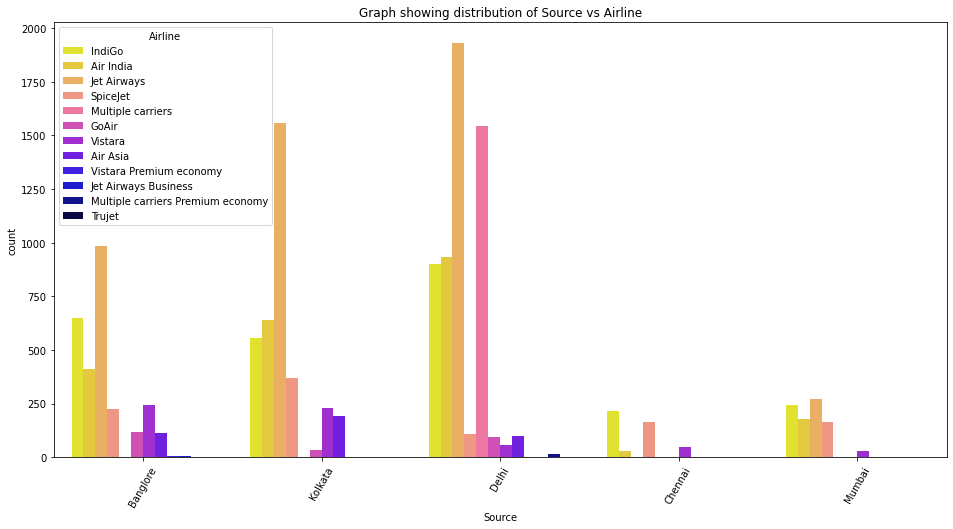

In [20]:
plt.figure(figsize=(16,8), facecolor='white')
sns.countplot(x='Source', hue='Airline', data=df,palette='gnuplot2_r')
plt.xticks(rotation=60)
plt.title("Graph showing distribution of Source vs Airline")
plt.show()

1. We can see that Jet airways is the highest used airline, and most of airlines from Delhi.
2. And the least of airlines used are from Chennai which has few of Airlines available.

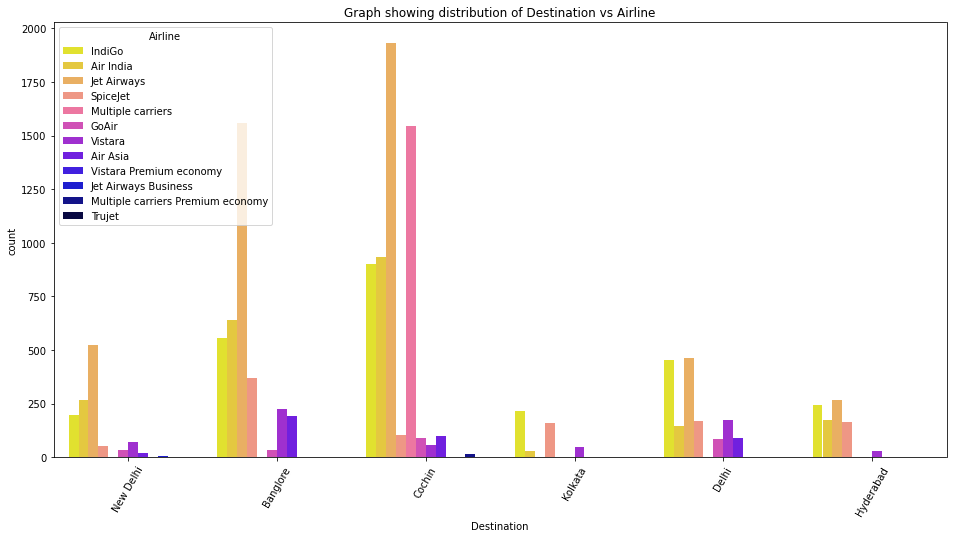

In [21]:
plt.figure(figsize=(16,8), facecolor='white')
sns.countplot(x='Destination', hue='Airline', data=df,palette='gnuplot2_r')
plt.xticks(rotation=60)
plt.title("Graph showing distribution of Destination vs Airline")
plt.show()

1. Cochin has highest Destination bases with Jet Airways as highes airlines.
2. Kolkata is least Destination places.

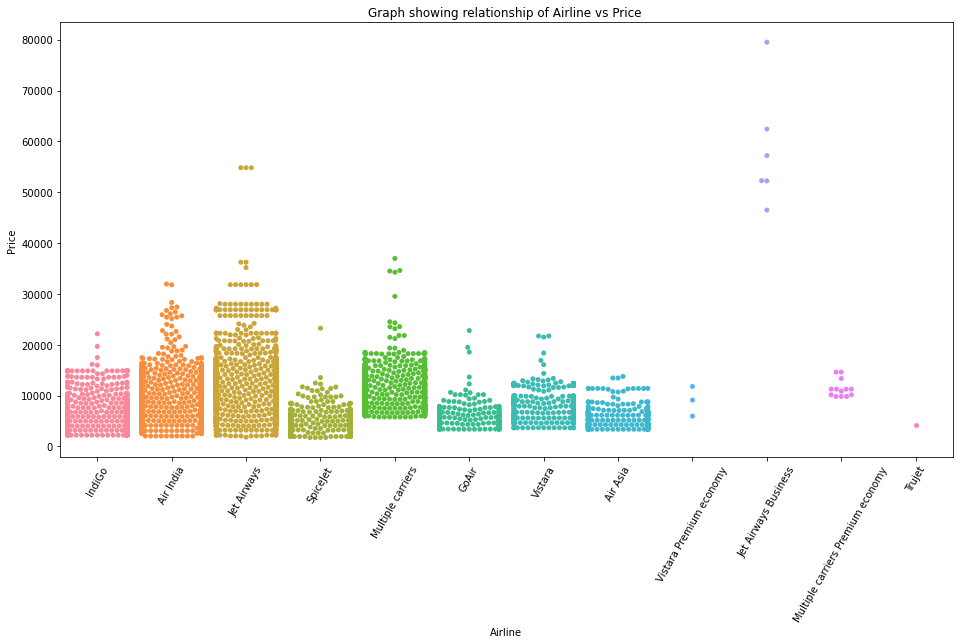

In [22]:
plt.figure(figsize=(16,8), facecolor='white')
sns.swarmplot(y='Price', x='Airline', data=df)
plt.title("Graph showing relationship of Airline vs Price ")
plt.xticks(rotation=60)
plt.show()

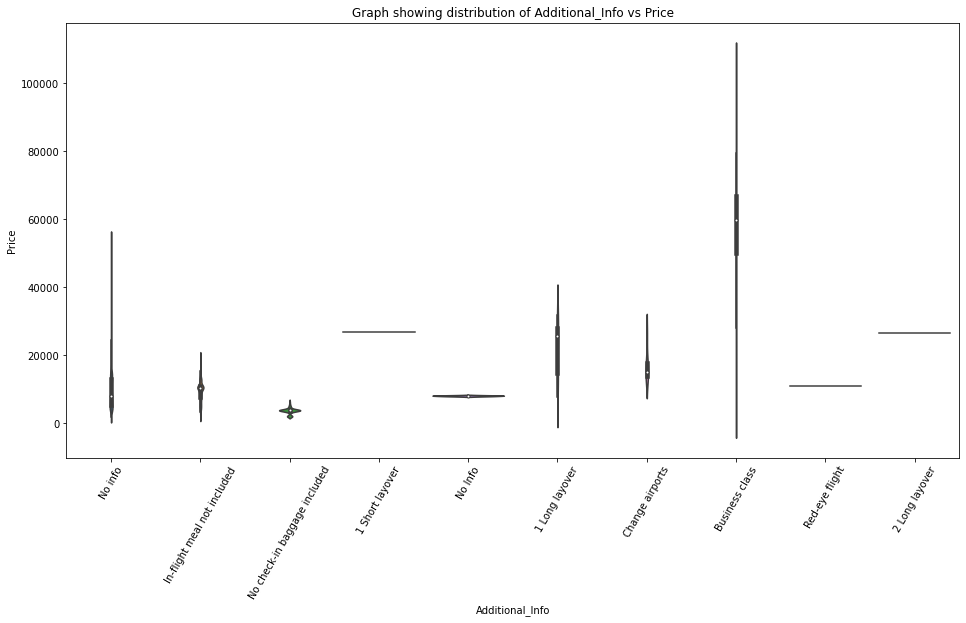

In [23]:
plt.figure(figsize=(16,8), facecolor='white')
sns.violinplot(y='Price', x='Additional_Info', data=df)
plt.title("Graph showing distribution of Additional_Info vs Price")
plt.xticks(rotation=60)
plt.show()

1. The average price of all airways fall in between 1000 to 25000, with Jetairways providing wide range of prices.
2. Premium economy and Business classes Airlines are the airlines having very high prices.

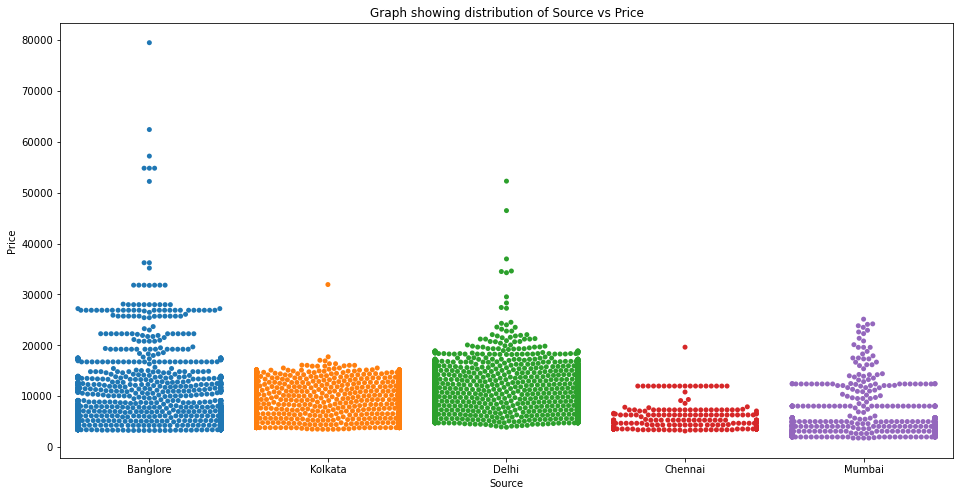

In [24]:
plt.figure(figsize=(16,8), facecolor='white')
sns.swarmplot(x='Source', y='Price',data=df) 
plt.title("Graph showing distribution of Source vs Price")
plt.xticks(rotation=0)
plt.show()

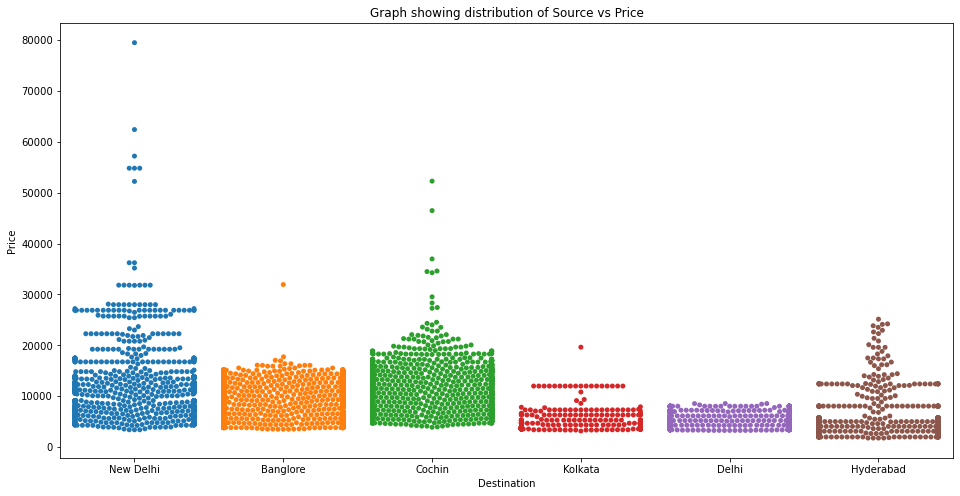

In [25]:
plt.figure(figsize=(16,8), facecolor='white')
sns.swarmplot(x='Destination', y='Price',data=df) 
plt.title("Graph showing distribution of Source vs Price")
plt.xticks(rotation=0)
plt.show()

From above graphs, we observe that,
1. flights sourcing from banglore and Delhi has highest price for airlines followed by Delhi.
2. flights landing to New Delhi and cochin has highest prices,  
3. The places mentioned in above points might have high revenue.

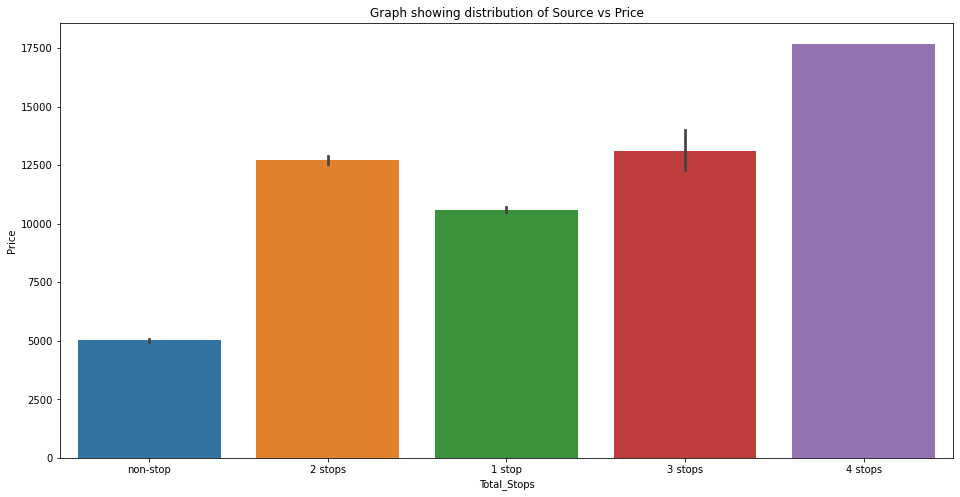

In [26]:
plt.figure(figsize=(16,8), facecolor='white')
sns.barplot(y='Price',x='Total_Stops',data=df) 
plt.title("Graph showing distribution of Source vs Price")
plt.xticks(rotation=0)
plt.show()

The flights with high number of stops seems to have high prices, as the travel cost increases based on fuel consumption of flight, and time duration of flight.

### Let us check for Categorical values, converting them to numerical ones.

In [27]:
#checking for unique values in all attributes
for i in df.columns:
    print('Name of Attribute:',i,'\n',df[i].value_counts())
    print('#'*60)

Name of Attribute: Airline 
 Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64
############################################################
Name of Attribute: Date_of_Journey 
 18/05/2019    633
6/06/2019     630
12/06/2019    628
9/05/2019     628
21/05/2019    615
9/06/2019     614
21/03/2019    516
15/05/2019    511
27/05/2019    447
24/06/2019    436
15/06/2019    433
1/06/2019     430
27/06/2019    430
3/06/2019     425
6/03/2019     405
24/03/2019    401
27/03/2019    364
24/05/2019    357
6/05/2019     354

## Feature Engineering:
1. We can extract the date and month of journey details from Date_of_Journey attribute.
2. Extract the Hours and minutes of Departure time and Arrival time seperately.
3. We can extract the minutes and hours details from duration attribute.
4. Additional information attribute has the many records as No-info, hence we can remove this attribute.
5. From Total stops attribute, we can replace non-stop = 0, 1-stop=1, 2-stop=2, 3-stop=3, 4-stop=4.
6. Route attribute has the same detail combined from total-stops, Source and destination attributes, So we can use only these details and drop 'Route'.

In [28]:
#extracting date and month of journey details and dropping Date_of_journey column from data
df['Date']  = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day
df['Month']  = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.month

#dropping the Date of Journey from the dataset permanently
df.drop(columns='Date_of_Journey', inplace=True)

In [29]:
#extracting Hour of departure and minute of departure from departure attribute 
df['Hour_Dep']  = pd.to_datetime(df['Dep_Time']).dt.hour
df['Minute_Dep']  = pd.to_datetime(df['Dep_Time']).dt.minute

#dropping the dep_time from the dataset permanently
df.drop(columns='Dep_Time', inplace=True)

In [30]:
#extracting Hour of Arrival and minute of departure from departure attribute 
df['Hour_Arr']  = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Minute_Arr']  = pd.to_datetime(df['Arrival_Time']).dt.minute

#dropping the arrival_time from the dataset permanently
df.drop(columns='Arrival_Time', inplace=True)

In [31]:
#we have some values where hour value is missing, and minutes missing in some data, Let us make the data complete before extracting particular values.

lst = list(df['Duration'])
Dur_hr = []
Dur_sec=[]
for i in range(len(lst)):
    if(lst[i].split() == 2):
        pass
    else:
        if('h' in lst[i]):
            lst[i] = lst[i]+'0m'
        else:
            lst[i] = '0h'+lst[i]
    
for i in range(len(lst)):  
    Dur_hr.append(lst[i].split('h')[0])
    Dur_sec.append(lst[i].split('m')[0].split('h')[-1].replace(' ',''))
    
df['Dur_hr']=Dur_hr
df['Dur_sec']=Dur_sec

#converting Dur_hr, Dur_sec columns into numerical datatypes
df['Dur_hr'] = df['Dur_hr'].astype(int)
df['Dur_sec'] = df['Dur_sec'].astype(int)

In [32]:
#converting the categorical values of Total_stops attribute into nummerical ones
df['Total_Stops'] = df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2, '3 stops':3,'4 stops':4})

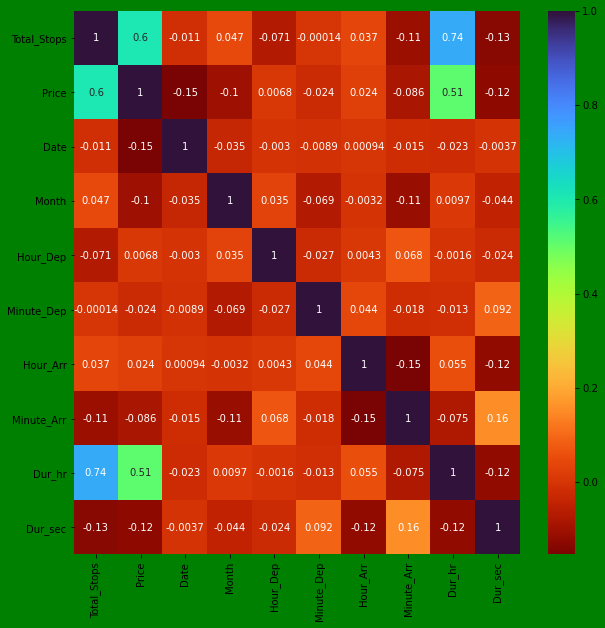

In [33]:
corr = df.corr()
plt.figure(figsize=(10,10), facecolor='g')
sns.heatmap(corr, annot=True, cmap='turbo_r')
plt.show()

### Droping the Duration, Route and Additional_info attributes. 

### Let us analyse the outliers present in remaining attributes using visualization techniques

In [34]:
df.drop(columns=['Duration','Route','Additional_Info'],inplace=True)
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

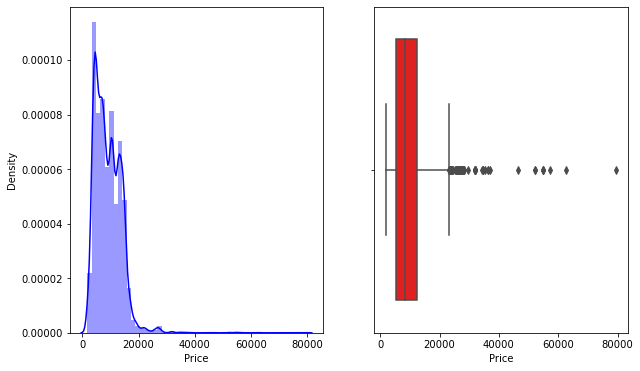

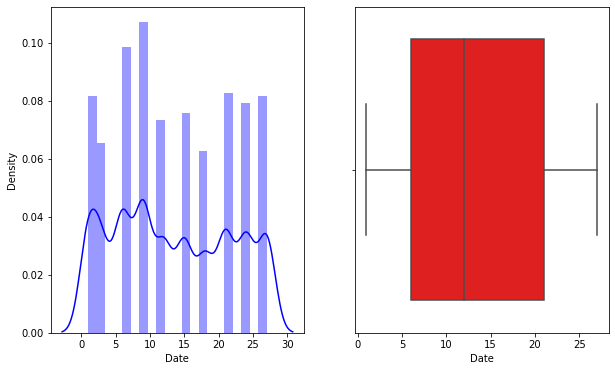

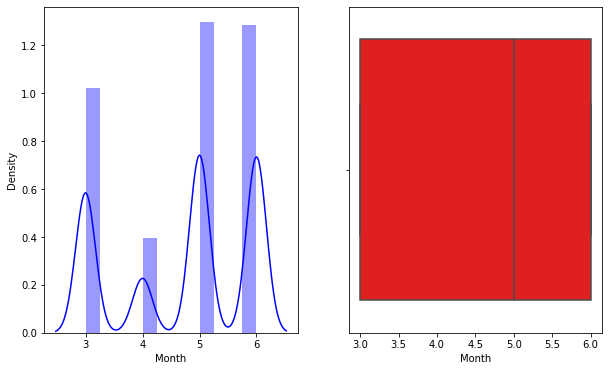

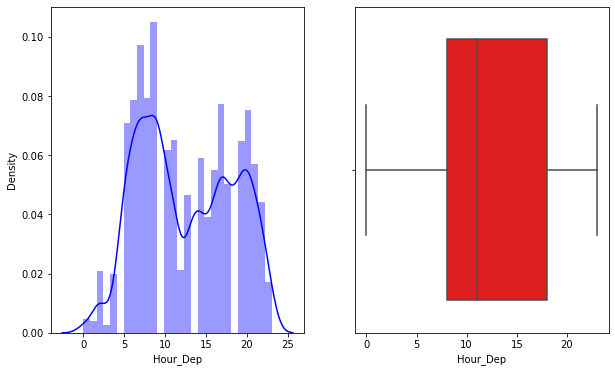

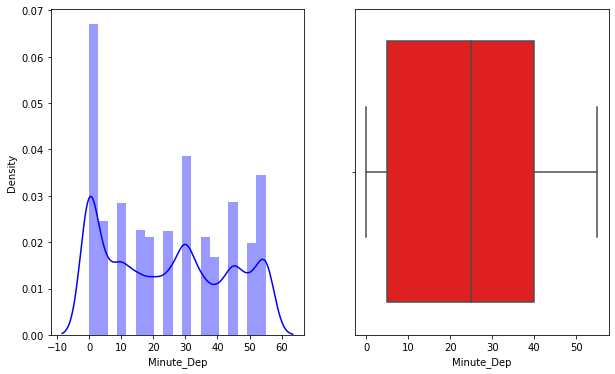

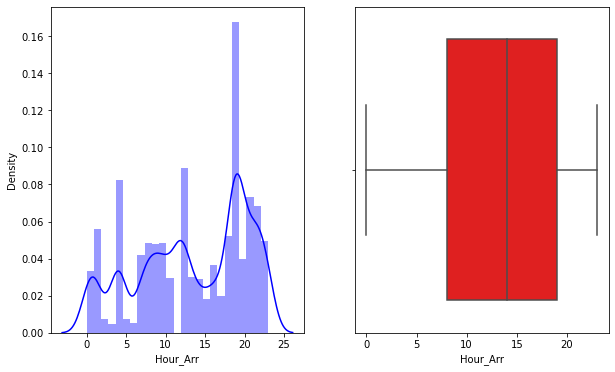

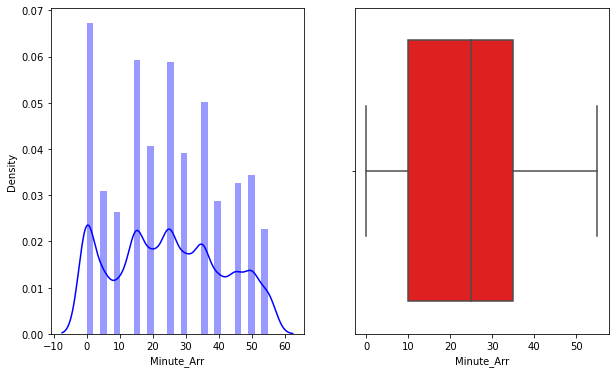

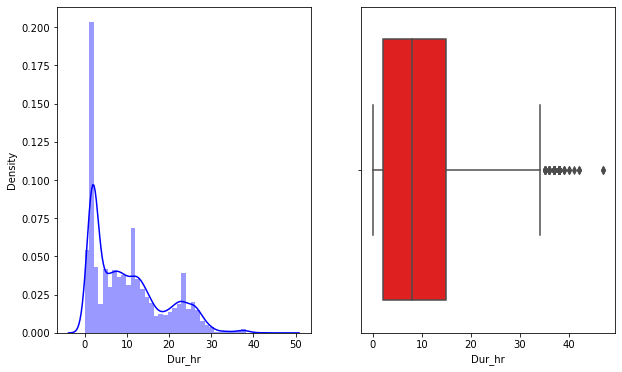

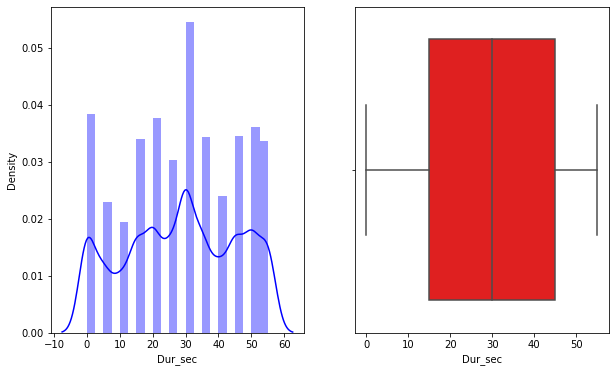

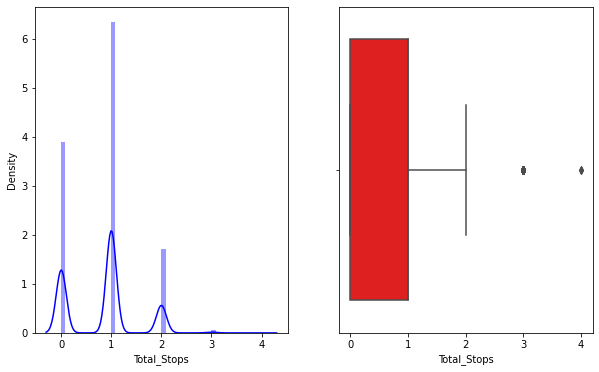

In [35]:
col = ['Price','Date','Month','Hour_Dep','Minute_Dep','Hour_Arr','Minute_Arr', 'Dur_hr','Dur_sec', 'Total_Stops']
for i in col:
    plt.figure(figsize=(10,6),facecolor='white')
    ax = plt.subplot(1,2,1)
    sns.distplot(df[i], color='b')

    ax = plt.subplot(1,2,2)
    sns.boxplot(df[i], color='r')

plt.show()

## Handling Outliers

Let us treat the outliers present in the attribute 'Price' using IQR method.

In [36]:
#defining first quantile and third quantile
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

#define Inter Quartile Range
IQR = q3-q1

In [37]:
# Checking the max number of outliers present in higher range and selecting index numbers
price_high = (q3.Price)+(1.5*IQR.Price)

index = np.where(df['Price']>price_high)

In [38]:
#removing the index numbers from the data set

print("Before removal of outliers", df.shape)

df = df.drop(df.index[index])
print("After removal of outliers", df.shape)

Before removal of outliers (13353, 14)
After removal of outliers (13259, 14)


In [39]:
#splitting the data set into train and test back
train = df.loc[df['label']=='train']
test = df.loc[df['label']=='test']

train.drop(columns= 'label',axis=1, inplace=True)
test.drop(columns= ['label','Price'],axis=1, inplace=True)

### We Split the datasets into train and test before proceeding with pre-processing techniques

### Let us encode other Categorical attribute, we will be using Label encoding for Ordinal Data.

In [40]:
train  = pd.get_dummies(train, drop_first=True)
test  = pd.get_dummies(test, drop_first=True)

train.shape, test.shape

((10588, 29), (2671, 28))

In [41]:
train.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Hour_Dep', 'Minute_Dep',
       'Hour_Arr', 'Minute_Arr', 'Dur_hr', 'Dur_sec', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [42]:
test.columns

Index(['Total_Stops', 'Date', 'Month', 'Hour_Dep', 'Minute_Dep', 'Hour_Arr',
       'Minute_Arr', 'Dur_hr', 'Dur_sec', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

### Let us check for skewness in the data set, andif present it can be removed using transformation method

In [43]:
print(train.skew())

print(test.skew())

Total_Stops                                    0.323130
Price                                          0.416478
Date                                           0.110543
Month                                         -0.407526
Hour_Dep                                       0.112237
Minute_Dep                                     0.174006
Hour_Arr                                      -0.371242
Minute_Arr                                     0.110329
Dur_hr                                         0.852948
Dur_sec                                       -0.090565
Airline_Air India                              1.815524
Airline_GoAir                                  7.184052
Airline_IndiGo                                 1.548725
Airline_Jet Airways                            0.593979
Airline_Multiple carriers                      2.460761
Airline_Multiple carriers Premium economy     28.490222
Airline_SpiceJet                               3.169554
Airline_Trujet                               102

In [44]:
pwr_trf = PowerTransformer()
col1=['Airline_Multiple carriers Premium economy','Airline_Trujet','Airline_Vistara Premium economy','Airline_GoAir','Destination_Kolkata','Source_Chennai']
col2=['Airline_Jet Airways Business','Airline_Multiple carriers Premium economy','Airline_GoAir','Destination_Kolkata','Source_Chennai']
train[col1]=pwr_trf.fit_transform(train[col1].values)
test[col2]=pwr_trf.fit_transform(test[col2].values)


## Model Building

In [45]:
X = train.drop(columns='Price')
y = train['Price']

x_val_test = test

In [48]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_test_scalar = scalar.fit_transform(x_val_test)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,random_state=56, test_size=0.25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7941, 28), (2647, 28), (7941,), (2647,))

## 1. Linear Model

*******************Results********************
The r2 score is: 0.6203988409357708
The mean absolute error 1493.4132980732904
The mean squared error 6504237.559123536
root mean square error 2550.340675110589
The cross validation score 0.2092925965128732

*****************XXXXXXXXXXX********************


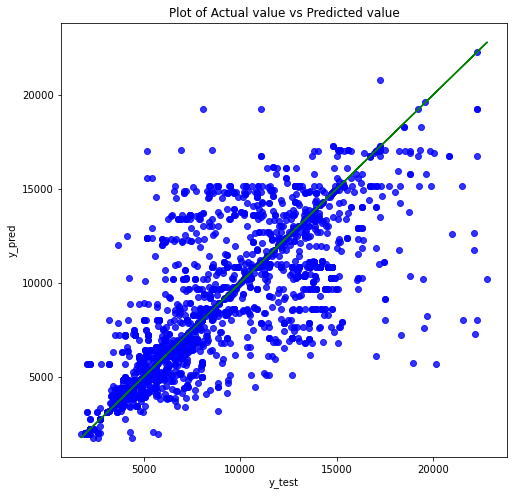

In [76]:
lm = LogisticRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(lm, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Lasso Regularization

*******************Results********************
The r2 score is: 0.6424090752515252
The mean absolute error 1836.6231884949464
The mean squared error 6127105.431617527
root mean square error 2475.2990590265103
The cross validation score 0.6450876158917034

*****************XXXXXXXXXXX********************


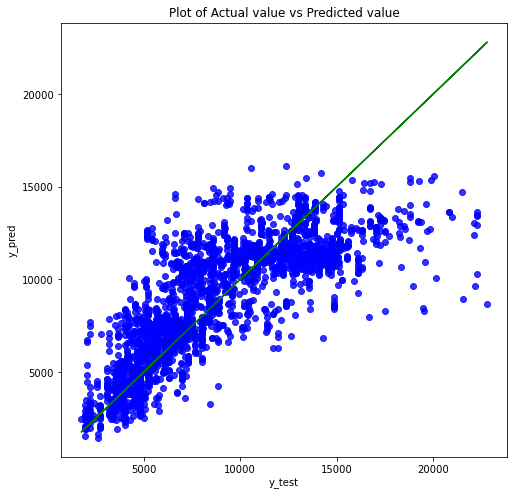

In [77]:
lass_lm = Lasso()
lass_lm.fit(X_train, y_train)
y_pred = lass_lm.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(lass_lm, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Ridge Regularization

*******************Results********************
The r2 score is: 0.6424412842628933
The mean absolute error 1836.614907556918
The mean squared error 6126553.549579026
root mean square error 2475.1875786653072
The cross validation score 0.6451267229609735

*****************XXXXXXXXXXX********************


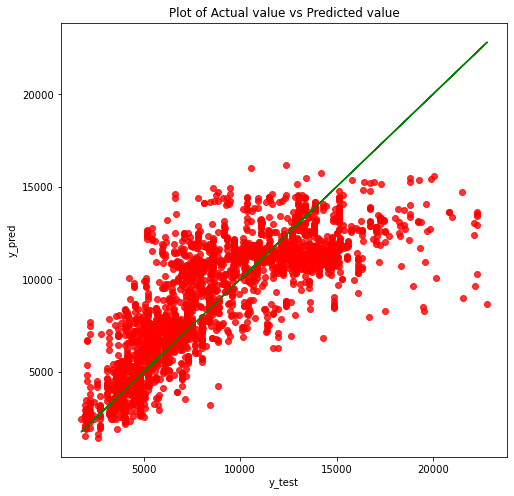

In [78]:
ridge_lm = Ridge()
ridge_lm.fit(X_train, y_train)
y_pred = ridge_lm.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(ridge_lm, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='red')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 2. RandomForest Regressor

*******************Results********************
The r2 score is: 0.8124688088293196
The mean absolute error 1130.7747033338362
The mean squared error 3213234.174854383
root mean square error 1792.549629676786
The cross validation score 0.815111005974491

*****************XXXXXXXXXXX********************


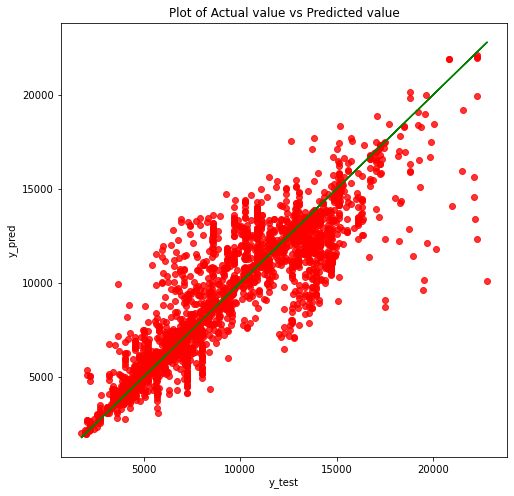

In [79]:
rand_for = RandomForestRegressor()
rand_for.fit(X_train, y_train)
y_pred = rand_for.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(rand_for, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='red')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 3. Gradient Boost Regressor

*******************Results********************
The r2 score is: 0.7727119544813303
The mean absolute error 1470.8191816370788
The mean squared error 3894443.9633604353
root mean square error 1973.4345601920616
The cross validation score 0.772905740688238

*****************XXXXXXXXXXX********************


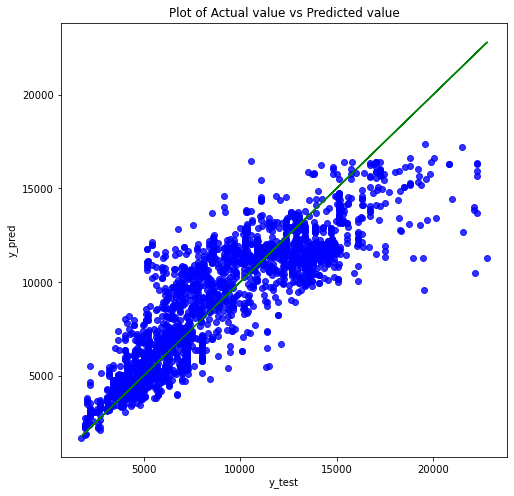

In [80]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(gbr, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 4. XGBoost Regressor

*******************Results********************
The r2 score is: 0.8503320513236893
The mean absolute error 1097.61371626672
The mean squared error 2564470.2865955173
root mean square error 1601.3963552461075
The cross validation score 0.8526910662696381

*****************XXXXXXXXXXX********************


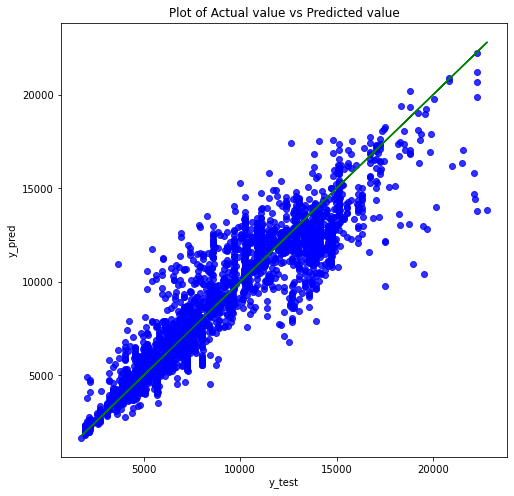

In [81]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(xgbr, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 5. DecisionTree Regressor

*******************Results********************
The r2 score is: 0.707946916451329
The mean absolute error 1303.790227930991
The mean squared error 5004153.938723083
root mean square error 2236.9966335967256
The cross validation score 0.7079298719561212

*****************XXXXXXXXXXX********************


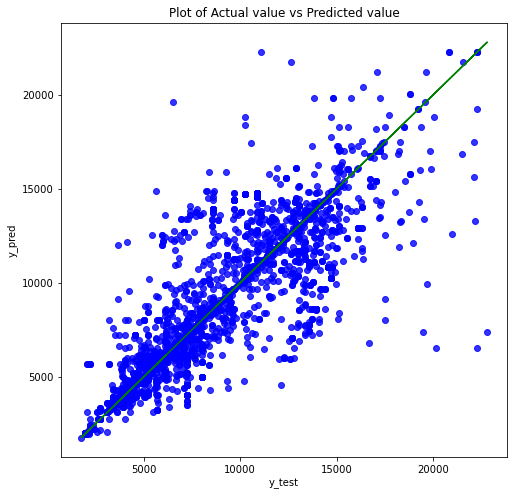

In [82]:
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train)
y_pred = dec_reg.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(dec_reg, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

1. We can see too big values in MAE and MSE, that is due to individual parameters we got after the encoding of the Attributes.
2. As per the models we trained, we got several CV score, and graphs for the values predicted. 
3. Decision tree has least difference between CV score to R2score value. Hence choosing Decision Tree to be BEST Model.

## Hyperparameter Optimization

Let us tune the parameters to improve th emodel performances using GridsearchCV.

In [87]:
dec_tree = DecisionTreeRegressor()

params = {'max_depth':[1,5,8,12],
           'min_samples_split':[2,4,7,12,16],
           'min_samples_leaf':[1,5,8,3,12],
           'max_features':['auto','sqrt']
         }
          
grid_CV = GridSearchCV(estimator=dec_tree, param_grid=params)
grid_CV.fit(X_train, y_train)
grid_CV.best_params_

{'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 16}

*******************Results********************
The r2 score is: 0.707946916451329
The mean absolute error 1303.790227930991
The mean squared error 5004153.938723083
root mean square error 2236.9966335967256
The cross validation score 0.8035233037592535

*****************XXXXXXXXXXX********************


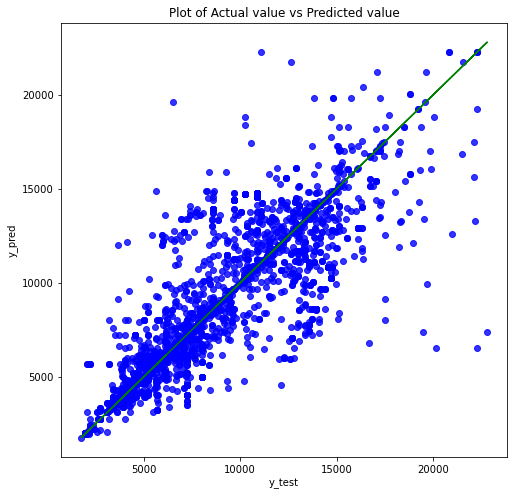

In [88]:
dec_tree = DecisionTreeRegressor(max_depth=12, max_features='auto', min_samples_leaf=1, min_samples_split=16)
dec_tree.fit(X_train, y_train)
y_pred = dec_reg.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(dec_tree, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### After the Hyperparameter tuning of the model, we see that the CV score of model has increased from 70.79% to 80.35%

### Let us predict for the Original Testing dataset

In [93]:
y_pred = dec_reg.predict(x_val_test)

print("*******************Results********************")
cv = cross_val_score(dec_tree, x_val_test,y_pred,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

*******************Results********************
The cross validation score 0.9919914377634826

*****************XXXXXXXXXXX********************


## Saving the Model

#### Let us save the best model into pickle file.

In [98]:
import pickle

file = open('Flight Price Prediction.pkl', 'wb')

pickle.dump('dec_tree',file)